<a href="https://colab.research.google.com/github/esurber05/ml-cc-fraud-detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Overview
This project aims to detect fraudulent credit card transactions using various machine learning models. The dataset used is from Kaggle, containing credit card transactions made in September 2013 by European cardholders. The dataset is highly imbalanced, with only 0.172% of transactions being fraudulent. We will preprocess the data, train multiple models, compare their performance, and optimize the best-performing models.

### Steps Involved:
1. Data Preparation
2. Data Visualization
3. Data Preprocessing
4. Model Training and Evaluation (Original Data)
5. Data Balancing
5. Model Training and Evaluation (Balanced Data)
6. Model Refinement and Stacking
7. Results Comparison and Visualization

## 1. Data Preparation

In [ ]:
# Prepare directory's and files to acesss data
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: creditcard.csv          


In [ ]:
import pandas as pd

#Load and display dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 2. Data Visualization

Visualize the distribution of the features in the dataset to understand characteristics within it

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

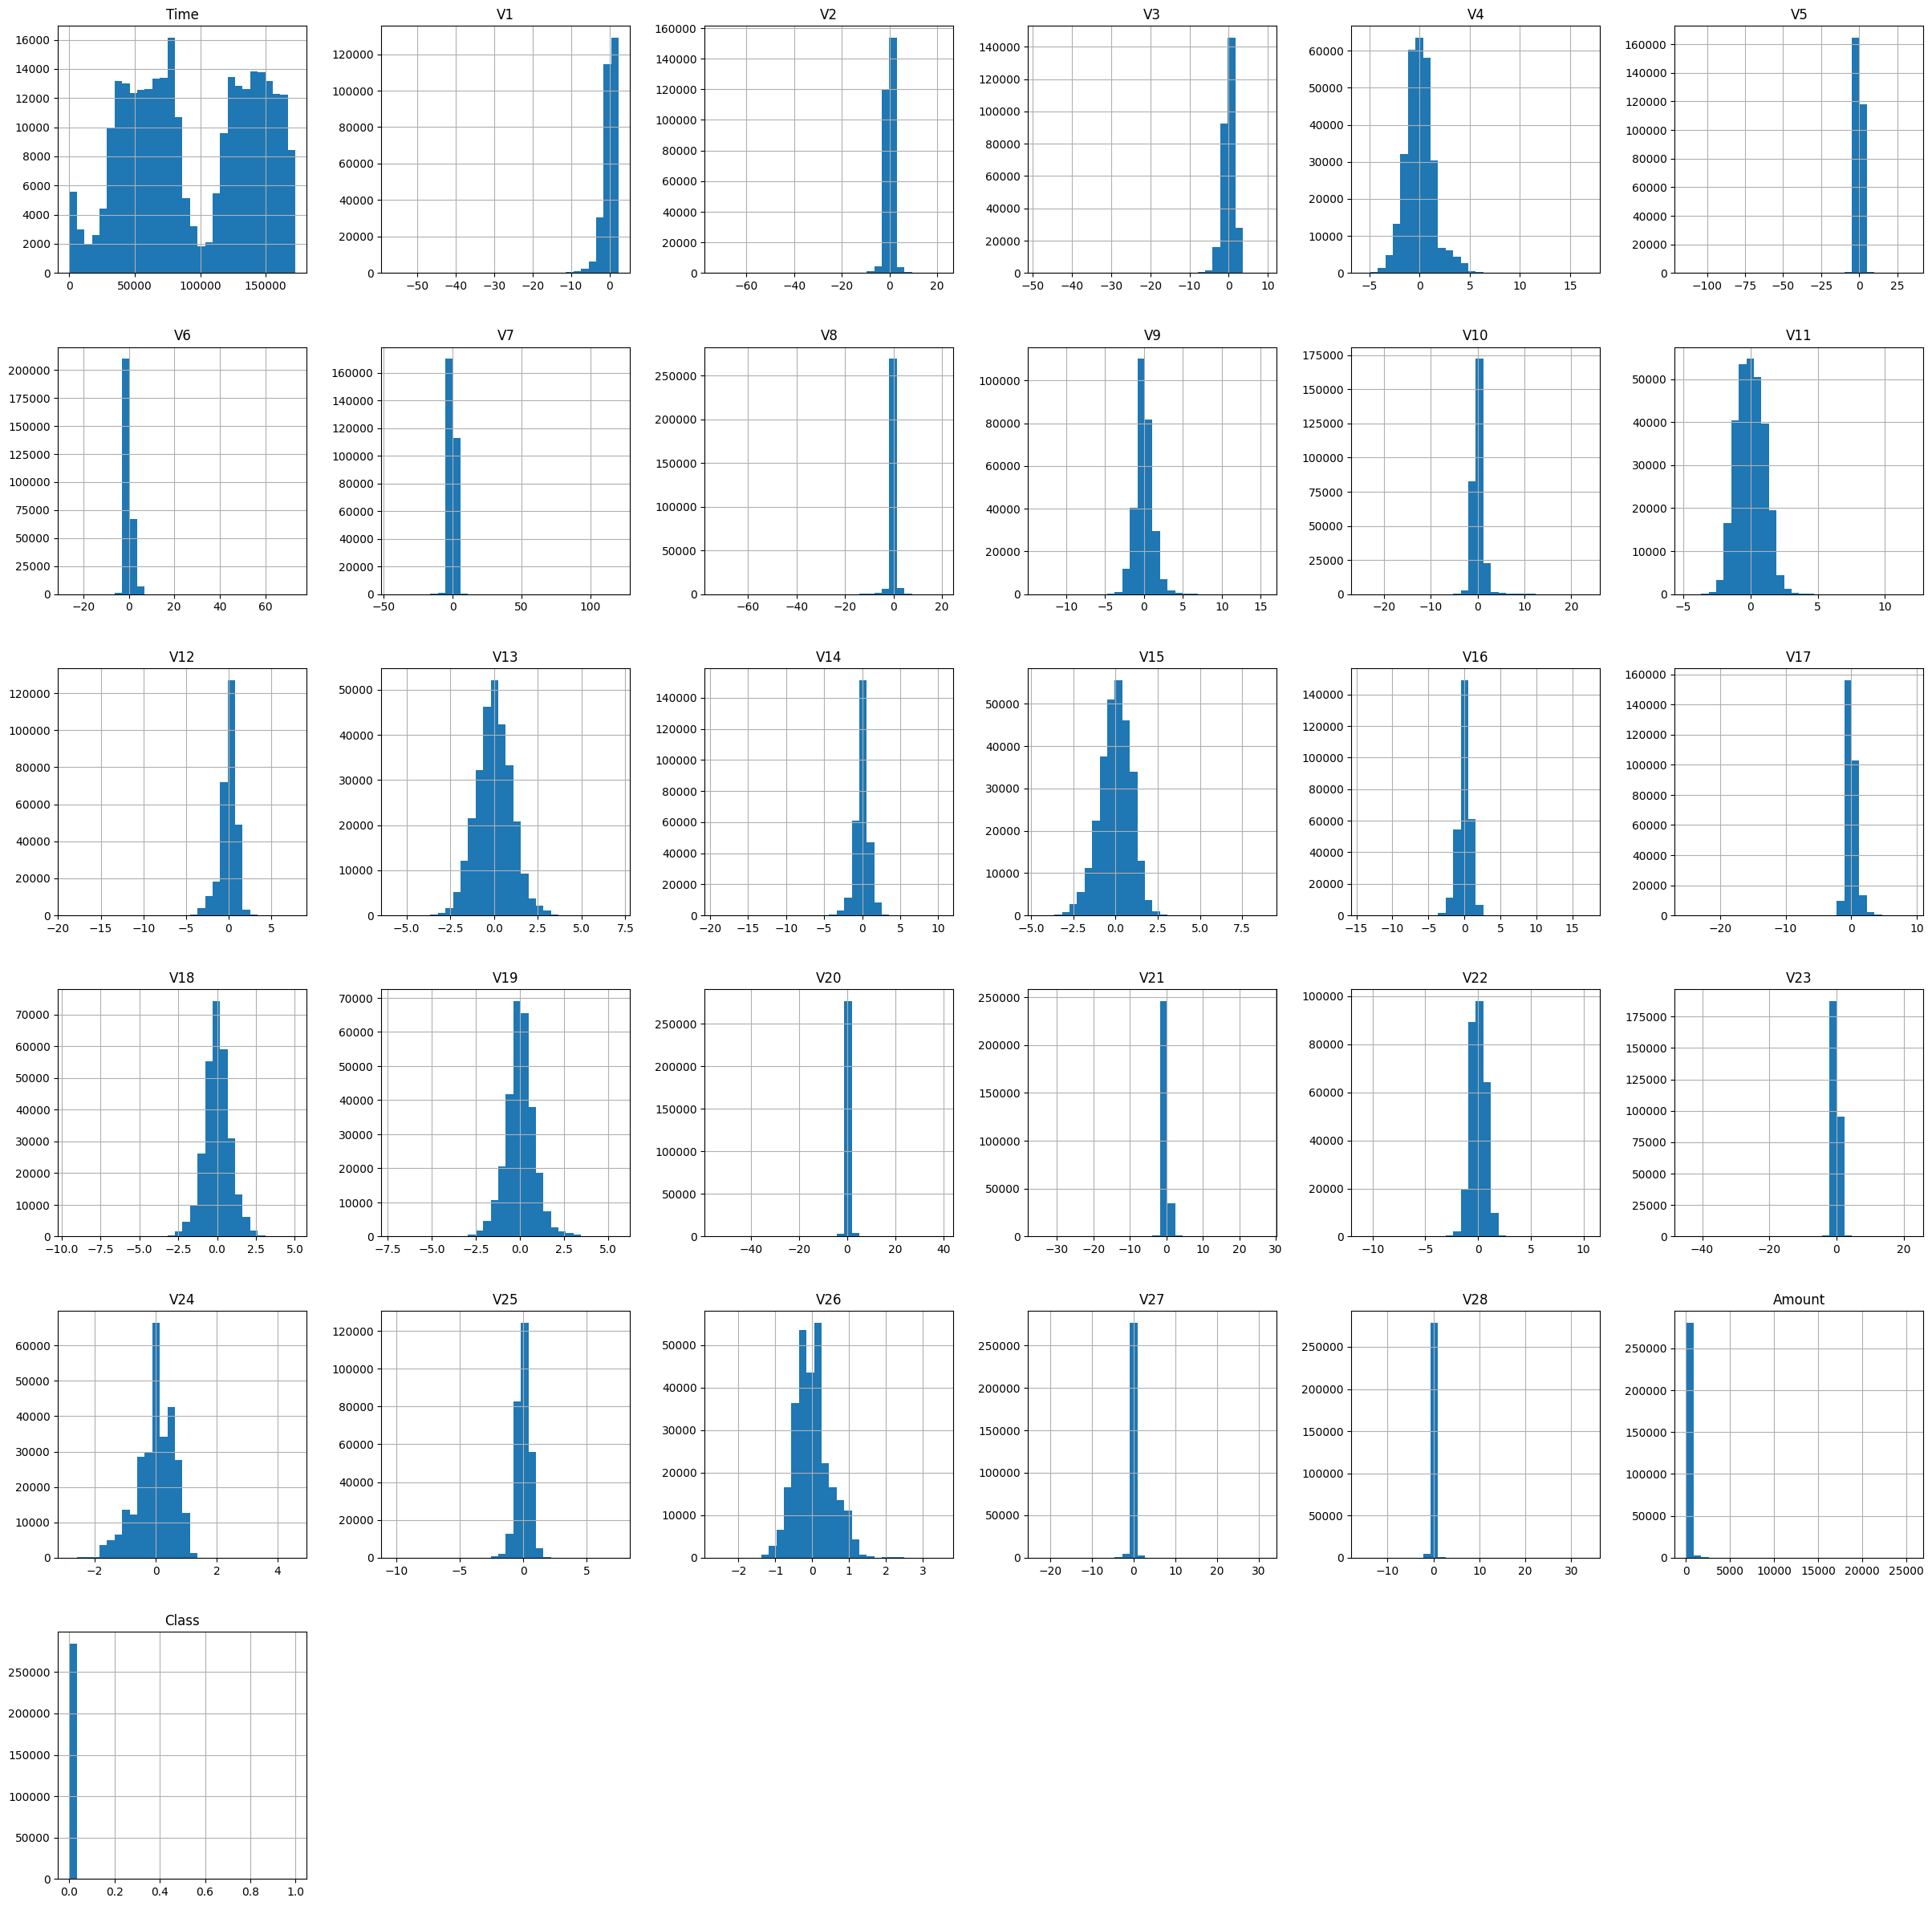

In [ ]:
# Visulize the distrubition of figures in data set
df.hist(bins=30, figsize=(30,30))

In [ ]:
# Display statistics of data set
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data Preprocessing

### 3.1 Scaling and Normalizing
Scale the 'Amount' feature and normalize the 'Time' feature to bring them to a similar range as other features.

In [ ]:
from sklearn.preprocessing import RobustScaler
new_dataset = df.copy()

# Scale 'Amount' value with RobustScaler to reduce the impact of outliers
new_dataset['Amount'] = RobustScaler().fit_transform(new_dataset['Amount'].to_numpy().reshape(-1,1))

# Normilize Time to bring it to similar range as other features
time = new_dataset['Time']
new_dataset['Time'] = (time - time.min()) / (time.max() - time.min())

In [ ]:
# Shuffle data set for randomness
new_dataset = new_dataset.sample(frac=1, random_state=1)

### 3.2 Splitting the Data
Split the dataset into training, testing, and validation sets.

In [ ]:
# Split dataset into training, teesting, and validation sets
train, test, val = new_dataset[:240000], new_dataset[240000:262000], new_dataset[262000:]

# Display class distrubution to check for imbalances
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [ ]:
# Convert to numpy arrays for compatibility with sklearn and tensorflow
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [ ]:
#Seperate features and labels for training
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

## 4. Model Training and Evaluation (Original Data)

Train and evaluate multiple models using the original dataset.

In [ ]:
# Define a method to get metrics for later graph
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt


# Function to display a comparision between the Percision Recall and F1-Score of Models
def plot_model_comparison(metrics):
    # Create a DataFrame from the collected metrics
    metrics_df = pd.DataFrame(metrics, columns=['Model', 'Precision', 'Recall', 'F1-Score'])

    # Find the best model based on F1-Score
    best_f1_score = metrics_df['F1-Score'].max()
    best_model_idx = metrics_df['F1-Score'].idxmax()
    best_model = metrics_df.loc[best_model_idx, 'Model']

    # Plotting the metrics
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Plot Precision
    colors = ['red' if metrics_df.loc[i, 'Precision'] == metrics_df['Precision'].max() else 'blue' for i in range(len(metrics_df))]
    metrics_df.plot(x='Model', y='Precision', kind='bar', ax=ax[0], legend=False, color=colors)
    ax[0].set_title('Precision')

    # Plot Recall
    colors = ['red' if metrics_df.loc[i, 'Recall'] == metrics_df['Recall'].max() else 'blue' for i in range(len(metrics_df))]
    metrics_df.plot(x='Model', y='Recall', kind='bar', ax=ax[1], legend=False, color=colors)
    ax[1].set_title('Recall')

    # Plot F1-Score
    colors = ['red' if metrics_df.loc[i, 'F1-Score'] == best_f1_score else 'blue' for i in range(len(metrics_df))]
    metrics_df.plot(x='Model', y='F1-Score', kind='bar', ax=ax[2], legend=False, color=colors)
    ax[2].set_title('F1-Score')

    # Setting the y-axis limit for better comparison
    for a in ax:
        a.set_ylim(0, 1)
        a.set_xlabel('')
        a.set_ylabel('Score')

    # Annotate the best overall model based on F1-Score
    plt.suptitle(f'Model Comparison (Best Model: {best_model} with F1-Score={best_f1_score:.4f})')

    # Annotate each plot with the best value
    precision_max_idx = metrics_df['Precision'].idxmax()
    recall_max_idx = metrics_df['Recall'].idxmax()

    ax[0].annotate(f'Best: {metrics_df["Precision"].max():.4f}', xy=(precision_max_idx, metrics_df['Precision'].max()), xytext=(0, 5),
                   textcoords="offset points", ha='center', va='bottom', color='red')
    ax[1].annotate(f'Best: {metrics_df["Recall"].max():.4f}', xy=(recall_max_idx, metrics_df['Recall'].max()), xytext=(0, 5),
                   textcoords="offset points", ha='center', va='bottom', color='red')
    ax[2].annotate(f'Best: {best_f1_score:.4f}', xy=(best_model_idx, best_f1_score), xytext=(0, 5),
                   textcoords="offset points", ha='center', va='bottom', color='red')

    plt.show()



metrics = []
metrics_b = []
metrics_b_refined = []

# Function to collect metrics for each model
def get_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return [model_name, precision, recall, f1]

### 4.1 Logistic Regression

In [ ]:
# Import and train logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report

# Display classification report
y_pred = logistic_model.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val, y_pred, 'Logistic Regression'))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.73      0.53      0.61        36

    accuracy                           1.00     22807
   macro avg       0.87      0.76      0.81     22807
weighted avg       1.00      1.00      1.00     22807



### 4.2 Shallow Neural Network

In [ ]:
# Import required neural network libaries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Set configuration settings for neural network
nn_shallow = Sequential()
nn_shallow.add(InputLayer((x_train.shape[1],)))
nn_shallow.add(Dense(2, 'relu'))
nn_shallow.add(BatchNormalization())
nn_shallow.add(Dense(1, 'sigmoid'))

# Save best model according to accuracy during training
checkpoint = ModelCheckpoint('nn_shallow', save_best_only=True)
nn_shallow.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Show underlying model aritechture
nn_shallow.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 62        
                                                                 
 batch_normalization_4 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 69 (276.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [ ]:
# Train neural network
nn_shallow.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0499 - accuracy: 0.9861 - val_loss: 0.0078 - val_accuracy: 0.9992
Epoch 2/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0088 - val_accuracy: 0.9991
Epoch 3/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0070 - val_accuracy: 0.9992
Epoch 4/5
7500/7500 [==============================] - 16s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0074 - val_accuracy: 0.9991
Epoch 5/5
7500/7500 [==============================] - 17s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0094 - val_accuracy: 0.9989


In [ ]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

y_pred = neural_net_predictions(nn_shallow, x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val, y_pred, 'Shallow Nueral Network'))

713/713 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.62      0.78      0.69        36

    accuracy                           1.00     22807
   macro avg       0.81      0.89      0.85     22807
weighted avg       1.00      1.00      1.00     22807



### 4.3 Random Forest Classifier

In [ ]:
# Train and display random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val, y_pred, 'Random Forest Classifier'))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



### 4.4 Gradient Boosting Classifier

In [ ]:
# Train and display results of gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val, y_pred, 'Gradient Boosting Classifier'))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.67      0.67      0.67        36

    accuracy                           1.00     22807
   macro avg       0.83      0.83      0.83     22807
weighted avg       1.00      1.00      1.00     22807



### 4.5 K-Nearest Neighbors

In [ ]:
# Train and display results of K-Nearest Neighbors Algorithim with n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_val)
print(classification_report(y_val, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val,  y_pred, 'K-Nearest Neighbors'))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.87      0.75      0.81        36

    accuracy                           1.00     22807
   macro avg       0.94      0.87      0.90     22807
weighted avg       1.00      1.00      1.00     22807



### 4.6 XGBoost


In [ ]:
# Train and display results of a XGBoost algorithim
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_val)
print(classification_report(y_val, xgb.predict(x_val), target_names=['Not Fraud', 'Fraud']))
metrics.append(get_metrics(y_val,  xgb.predict(x_val), 'XGBoost'))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.87      0.75      0.81        36

    accuracy                           1.00     22807
   macro avg       0.94      0.87      0.90     22807
weighted avg       1.00      1.00      1.00     22807



### 4.7 Display Data

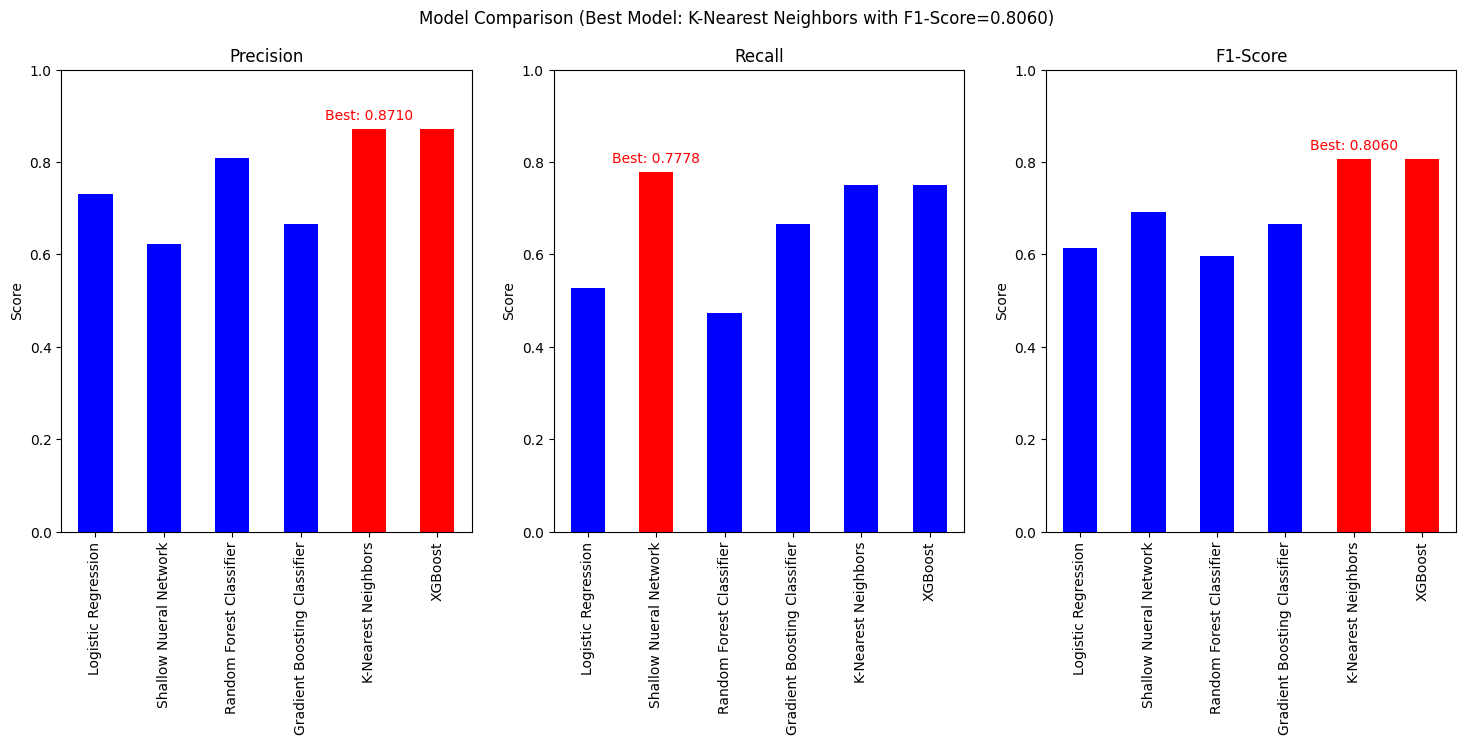

In [ ]:
plot_model_comparison(metrics)

## 5. Data Balancing

To address the class imbalance in the dataset, the dataset will be balanced by undersampling the non-fraudulent transactions.

In [ ]:
# Extract fraudulent and non-fraudulent transactions in order to balance the data set
frauds = new_dataset.query('Class == 1')
not_frauds = new_dataset.query('Class == 0')
# Display the imbalance in the dataset
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [ ]:
# Balance dataset by undersampling non-fraudulent transactions
# Adresses the common problem of class imbalance in fraud detection

balanced_frauds = len(frauds)
not_frauds_sampled = not_frauds.sample(balanced_frauds, random_state=1)
balanced_dataset = pd.concat([frauds, not_frauds_sampled]).sample(frac=1, random_state=1)

balanced_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

### 5.1 Splitting the Balanced Data
Split the balanced dataset into training, testing, and validation sets.

In [ ]:
# Split each class into 70% training, 15% testing, and 15% validation
train_size = int(0.7 * balanced_frauds)
test_size = int(0.15 * balanced_frauds)
val_size = balanced_frauds - train_size - test_size

# Split fraud class
frauds_train = frauds[:train_size]
frauds_test = frauds[train_size:train_size + test_size]
frauds_val = frauds[train_size + test_size:]

# Split non-fraud class
not_frauds_train = not_frauds_sampled[:train_size]
not_frauds_test = not_frauds_sampled[train_size:train_size + test_size]
not_frauds_val = not_frauds_sampled[train_size + test_size:]

# Combine splits to ensure balanced class distribution
train = pd.concat([frauds_train, not_frauds_train]).sample(frac=1, random_state=1)
test = pd.concat([frauds_test, not_frauds_test]).sample(frac=1, random_state=1)
val = pd.concat([frauds_val, not_frauds_val]).sample(frac=1, random_state=1)

# Convert the subsets to numpy arrays for compatibility with sklearn and tensorflow
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()

# Separate features and labels for training, testing, and validation sets
x_train_b, y_train_b = train_np[:, :-1], train_np[:, -1].astype(int)
x_test_b, y_test_b = test_np[:, :-1], test_np[:, -1].astype(int)
x_val_b, y_val_b = val_np[:, :-1], val_np[:, -1].astype(int)

# Display shape
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((688, 30), (688,), (146, 30), (146,), (150, 30), (150,))

In [ ]:
# Display class distribution to ensure balance
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    344
 0    344
 Name: count, dtype: int64,
 0    73
 1    73
 Name: count, dtype: int64,
 1    75
 0    75
 Name: count, dtype: int64)

## 6. Model Training and Evaluation (Balanced Data)

Train and evaluate multiple models using the balanced dataset.

### 6.1 Logistic Regression (Balanced Data)

In [ ]:
# Train new logistic regression model on balanced dataset
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)

pred_y = logistic_model_b.predict(x_val_b)
print(classification_report(y_val_b, pred_y, target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b, pred_y, 'Logistic Regression (Balanced)'))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.96      0.95        75
       Fraud       0.96      0.93      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### 6.2 Shallow Neural Network (Balanced Data)

In [ ]:
# Define new shallow nueral network for balanced dataset
nn_shallow_b = Sequential()
nn_shallow_b.add(InputLayer((x_train.shape[1],)))
nn_shallow_b.add(Dense(2, 'relu'))
nn_shallow_b.add(BatchNormalization())
nn_shallow_b.add(Dense(1, 'sigmoid'))

# Save best model in training and compile with loss function and optimizer
checkpoint = ModelCheckpoint('nn_shallow_b', save_best_only=True)
nn_shallow_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_shallow_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 [==============================] - 2s 73ms/step - loss: 0.8222 - accuracy: 0.3808 - val_loss: 0.7887 - val_accuracy: 0.5133
Epoch 2/40
22/22 [==============================] - 1s 35ms/step - loss: 0.7356 - accuracy: 0.5000 - val_loss: 0.6550 - val_accuracy: 0.6667
Epoch 3/40
22/22 [==============================] - 1s 36ms/step - loss: 0.6609 - accuracy: 0.6381 - val_loss: 0.6214 - val_accuracy: 0.7800
Epoch 4/40
22/22 [==============================] - 1s 37ms/step - loss: 0.6280 - accuracy: 0.6962 - val_loss: 0.6104 - val_accuracy: 0.7667
Epoch 5/40
22/22 [==============================] - 1s 37ms/step - loss: 0.6137 - accuracy: 0.7108 - val_loss: 0.5998 - val_accuracy: 0.7733
Epoch 6/40
22/22 [==============================] - 1s 50ms/step - loss: 0.6071 - accuracy: 0.7297 - val_loss: 0.5890 - val_accuracy: 0.7733
Epoch 7/40
22/22 [==============================] - 1s 53ms/step - loss: 0.5923 - accuracy: 0.7369 - val_loss: 0.5764 - val_accuracy: 0.7933
Epoch 8/40
22

In [ ]:
# Display classification report for nueral network trained on balanced dataset
y_pred = neural_net_predictions(nn_shallow_b, x_val_b)
print(classification_report(y_val_b, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b, y_pred, 'Shallow Nueral Network (Balanced)'))

5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

   Not Fraud       0.96      0.91      0.93        75
       Fraud       0.91      0.96      0.94        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



### 6.3 Random Forest Classifier (Balanced Data)

In [ ]:
# Train and display classification report for random forest model trained on balanced dataset
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)

y_pred = rf_b.predict(x_val_b)
print(classification_report(y_val_b, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b, y_pred, 'Random Forest Model (Balanced)'))

              precision    recall  f1-score   support

   Not Fraud       0.87      0.99      0.93        75
       Fraud       0.98      0.85      0.91        75

    accuracy                           0.92       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.92      0.92       150



### 6.4 Gradient Boosting Classifier (Balanced Data)

In [ ]:
# Train and display classification report for graident boosting model trained on balanced dataset
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)

y_pred = gbc_b.predict(x_val_b)
print(classification_report(y_val_b, gbc_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b, gbc_b.predict(x_val_b), 'Graident Boosting Classifier (Balanced)'))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.93      0.93        75
       Fraud       0.93      0.92      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



### 6.5 K-Nearest Neighbors (Balanced Data)

In [ ]:
# Train and display classification report for K-Nearest Neighbors trained on balanced dataset
knn_b = KNeighborsClassifier(n_neighbors=5)
knn_b.fit(x_train_b, y_train_b)

y_pred = knn_b.predict(x_val_b)
print(classification_report(y_val_b, knn_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b, knn_b.predict(x_val_b), 'K-Nearest Neighbors (Balanced)'))

              precision    recall  f1-score   support

   Not Fraud       0.92      0.92      0.92        75
       Fraud       0.92      0.92      0.92        75

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



### 6.6 XGBoost (Balanced Data)

In [ ]:
# Train and display classification report for XGB Classifier trained on balanced dataset
xgb_b = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_b.fit(x_train_b, y_train_b)

y_pred = xgb_b.predict(x_val_b)
print(classification_report(y_val_b, xgb_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))
metrics_b.append(get_metrics(y_val_b,  xgb_b.predict(x_val_b), 'XGBoost (Balanced)'))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.99      0.96        75
       Fraud       0.99      0.93      0.96        75

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



### 6.7 Display Data

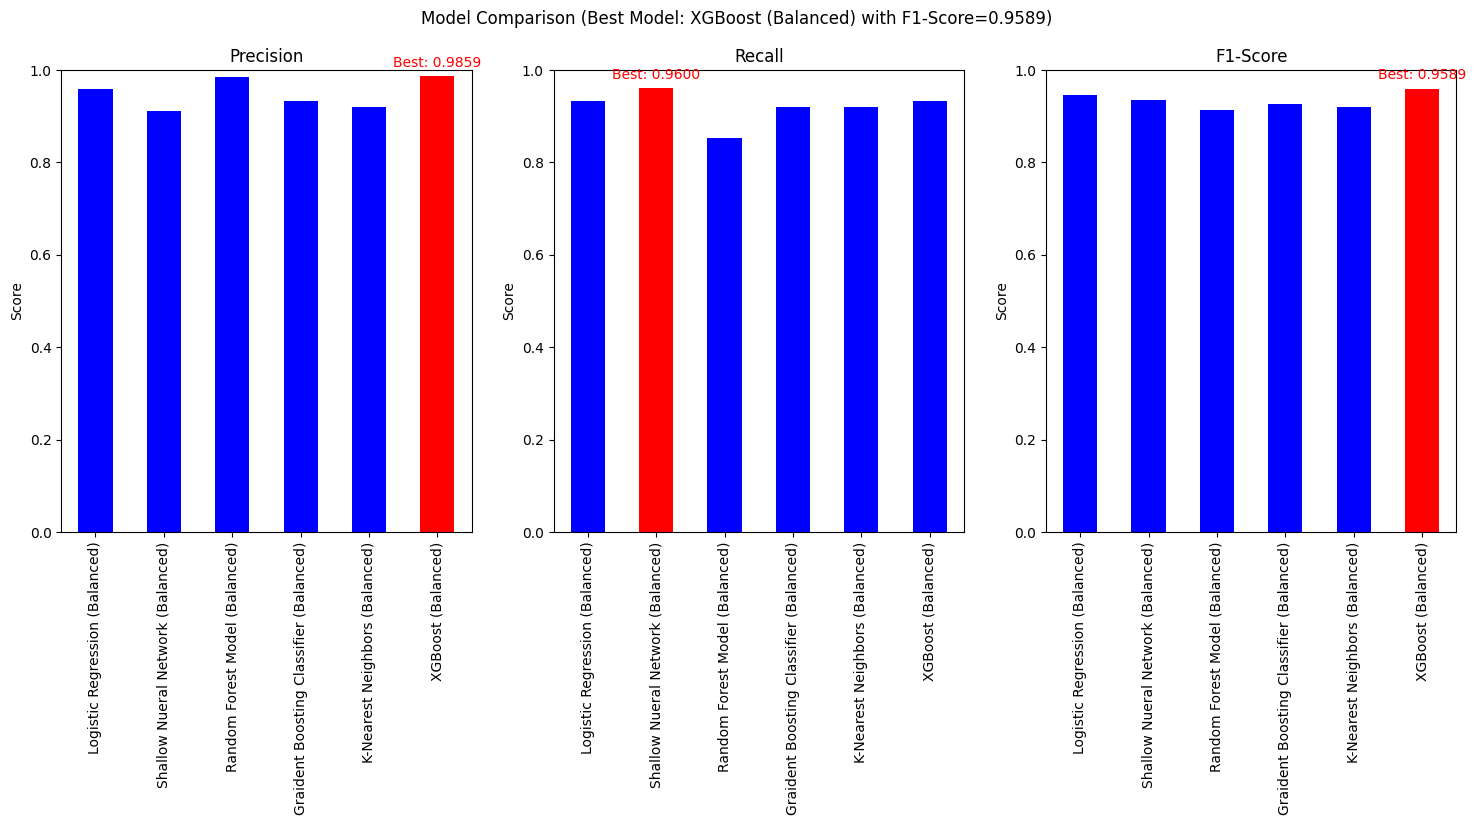

In [ ]:
# Display comparision over models trained with balanced data
plot_model_comparison(metrics_b)

## 7. Model Refinement and Stacking

### 7.1 Random Forest with Grid Search
Refine the random forest model using Grid Search to optimize hyperparameters and improve recall.

In [ ]:
# Make scorer object to prioritize recall for 'Fraud' class
from sklearn.metrics import recall_score, make_scorer
recall_scorer = make_scorer(recall_score, pos_label=1)

In [ ]:
# Use GridSearchCV to find best Random Forest Classifier Model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'class_weight': ['balanced', {0: 1, 1: 2}]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring=recall_scorer,  # Use the custom recall scorer
    cv=5  # 5-fold cross-validation
)

grid_search.fit(x_train_b, y_train_b)
best_rf = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}


In [ ]:
# Display model classification report
y_pred = best_rf.predict(x_val_b)
print(classification_report(y_val_b, best_rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))
metrics_b_refined.append(get_metrics(y_val_b,  best_rf.predict(x_val_b), 'Grid Search (Recall Score)'))

              precision    recall  f1-score   support

   Not Fraud       0.91      0.97      0.94        75
       Fraud       0.97      0.91      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



### 7.2 Stacking Classifier
Use a stacking classifier to combine the best performing models and further optimize the performance.

In [ ]:
# Use stacking classifier to combine the best preforming models
from sklearn.ensemble import StackingClassifier

# Base models
estimators = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

stacking_clf.fit(x_train_b, y_train_b)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [ ]:
# Predict and evaluate
y_pred = stacking_clf.predict(x_val_b)
print(classification_report(y_val_b, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics_b_refined.append(get_metrics(y_val_b, y_pred, 'Stacking Classifier'))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.97      0.95        75
       Fraud       0.97      0.93      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### 7.3 Stacking Classifier with Grid Search
We will refine the stacking classifier using Grid Search to optimize the hyperparameters.

In [ ]:
# Combine Stacking classifier and Grid Search for model improvement

# Define parameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(x_train_b, y_train_b)
best_rf = grid_search_rf.best_estimator_

# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, scoring='f1', cv=5)
grid_search_xgb.fit(x_train_b, y_train_b)
best_xgb = grid_search_xgb.best_estimator_

# Evaluate the best estimators
print("Best Random Forest parameters: ", grid_search_rf.best_params_)
print("Best XGBoost parameters: ", grid_search_xgb.best_params_)

Best Random Forest parameters:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best XGBoost parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Adding the tuned models back to the stacking classifier
estimators = [
    ('lr', LogisticRegression(solver='liblinear')),
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Stacking classifier with the best estimators
stacking_clf_grid = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(solver='liblinear')
)

# Train and evaluate the stacking classifier
stacking_clf_grid.fit(x_train_b, y_train_b)

StackingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_split=5)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='...
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(solver='liblinear'))

In [ ]:
# Print output of model
y_pred = stacking_clf_grid.predict(x_val_b)
print(classification_report(y_val_b, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics_b_refined.append(get_metrics(y_val_b, y_pred, 'Stacking Classifier + Grid Search'))

              precision    recall  f1-score   support

   Not Fraud       0.94      0.96      0.95        75
       Fraud       0.96      0.93      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### 7.4 Final Stacking Classifier with Recall Priority
Create a final stacking classifier that prioritizes recall for the 'Fraud' class.

In [ ]:
# Final estimator with balanced class weights
final_estimator = LogisticRegression(solver='liblinear', class_weight={0: 1, 1: 2})

# Create stacking classifier
stacking_clf_recall = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator
)

# Train the stacking classifier
stacking_clf_recall.fit(x_train_b, y_train_b)

StackingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       min_samples_split=5)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='...
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(class_weight={0: 1, 1: 2},
                                                      solver='liblinear'))

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluate using cross-validation with the custom recall scorer
cv_scores = cross_val_score(stacking_clf_recall, x_train_b, y_train_b, cv=5, scoring=recall_scorer)
print(f"Cross-validated recall scores: {cv_scores}")
print(f"Mean cross-validated recall score: {np.mean(cv_scores)}")

Cross-validated recall scores: [0.95652174 0.86956522 0.89855072 0.94202899 0.94117647]
Mean cross-validated recall score: 0.9215686274509804


In [ ]:
# Predict and evaluate on the validation set
y_pred = stacking_clf_recall.predict(x_val_b)
print(classification_report(y_val_b, y_pred, target_names=['Not Fraud', 'Fraud']))
metrics_b_refined.append(get_metrics(y_val_b, y_pred, 'Stacking Classifier + Grid Search (Recall Priority)'))

              precision    recall  f1-score   support

   Not Fraud       0.93      0.93      0.93        75
       Fraud       0.93      0.93      0.93        75

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



### 7.5 Data Display

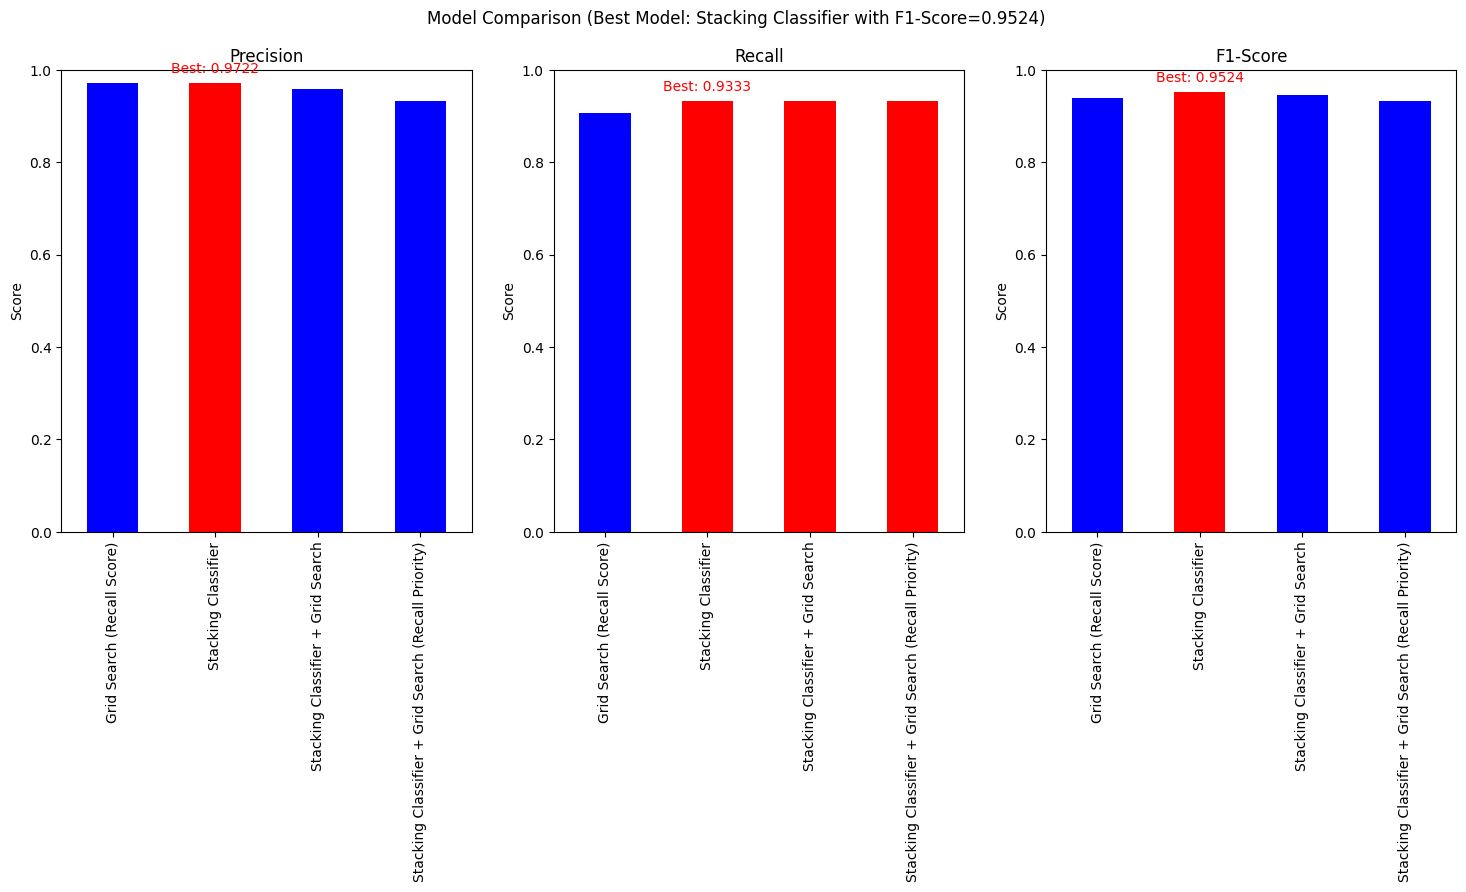

In [ ]:
# Shows Plot model for the refined models
plot_model_comparison(metrics_b_refined)

## 8. Results Comparison and Visualization

Combine and visualize the metrics of all models trained on the original, balanced, and refined datasets.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to combine and label metrics
def combine_metrics(metrics, metrics_b, metrics_b_refined):
    metrics_df = pd.DataFrame(metrics, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
    metrics_df['Dataset'] = 'Original'

    metrics_b_df = pd.DataFrame(metrics_b, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
    metrics_b_df['Dataset'] = 'Balanced'

    metrics_b_refined_df = pd.DataFrame(metrics_b_refined, columns=['Model', 'Precision', 'Recall', 'F1-Score'])
    metrics_b_refined_df['Dataset'] = 'Refined'

    all_metrics_df = pd.concat([metrics_df, metrics_b_df, metrics_b_refined_df], ignore_index=True)
    return all_metrics_df

# Combine all metrics into one DataFrame with an additional column for dataset type
all_metrics_df = combine_metrics(metrics, metrics_b, metrics_b_refined)

# Show combined summpary table
print("Combined Summary Table:")
print(all_metrics_df)


Combined Summary Table:
                                                Model  Precision    Recall  \
0                                 Logistic Regression   0.730769  0.527778   
1                              Shallow Nueral Network   0.622222  0.777778   
2                            Random Forest Classifier   0.809524  0.472222   
3                        Gradient Boosting Classifier   0.666667  0.666667   
4                                 K-Nearest Neighbors   0.870968  0.750000   
5                                             XGBoost   0.870968  0.750000   
6                      Logistic Regression (Balanced)   0.958904  0.933333   
7                   Shallow Nueral Network (Balanced)   0.911392  0.960000   
8                      Random Forest Model (Balanced)   0.984615  0.853333   
9             Graident Boosting Classifier (Balanced)   0.932432  0.920000   
10                     K-Nearest Neighbors (Balanced)   0.920000  0.920000   
11                                 XGBoo

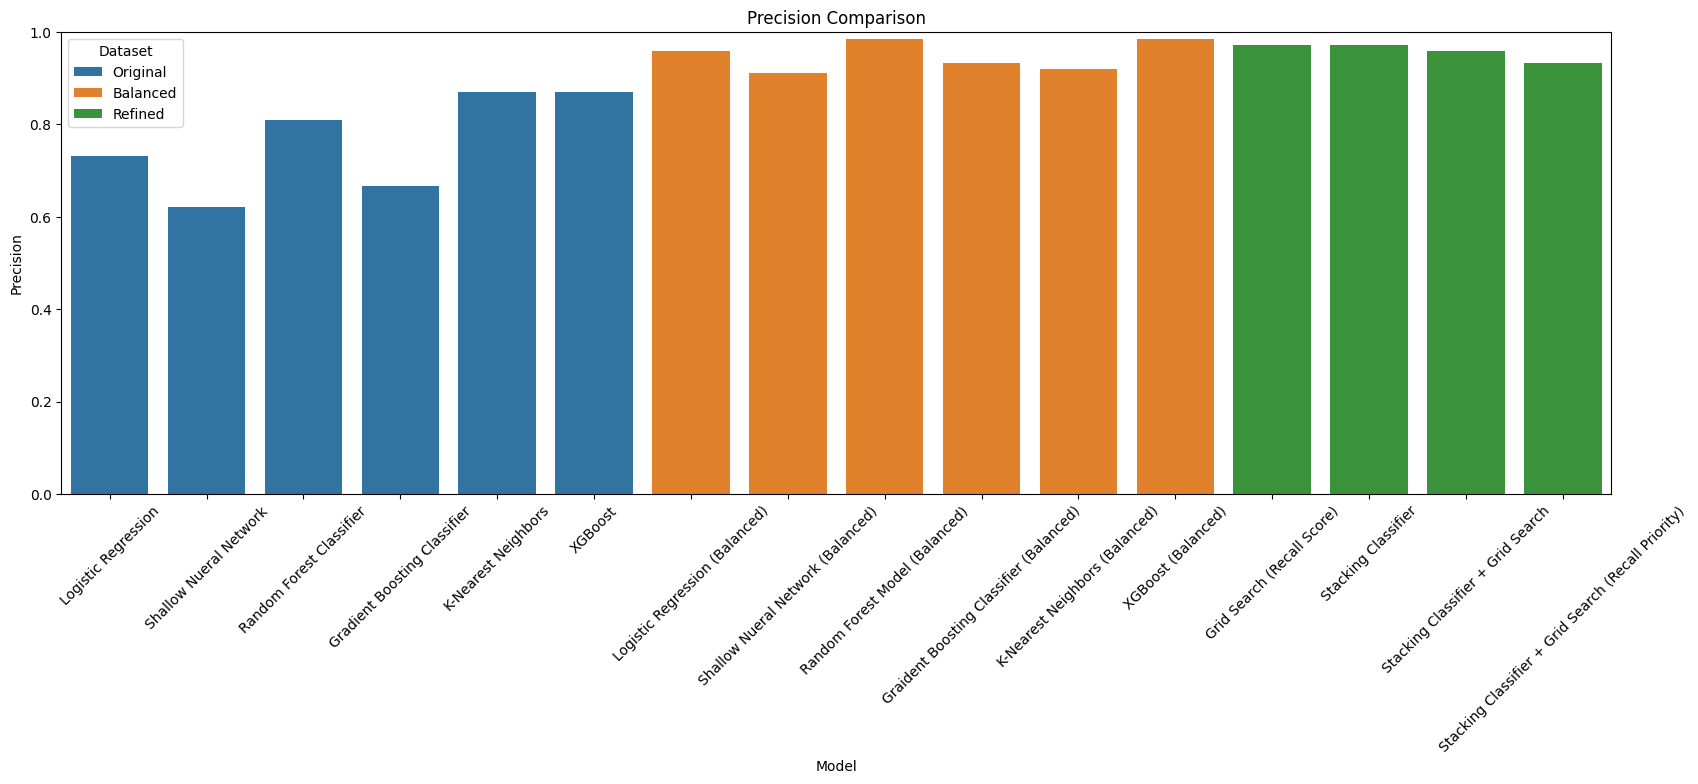

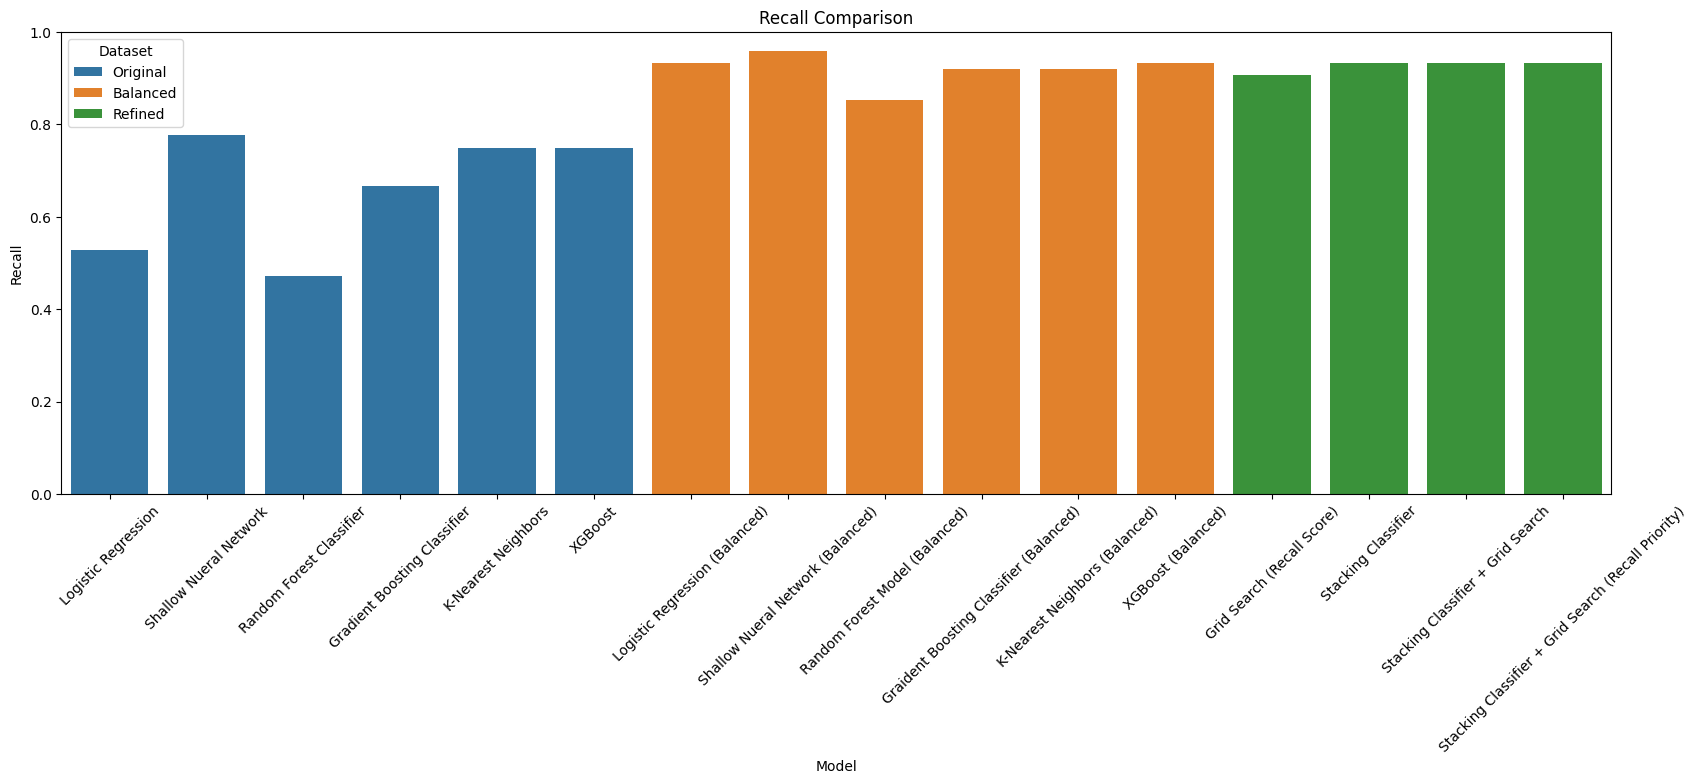

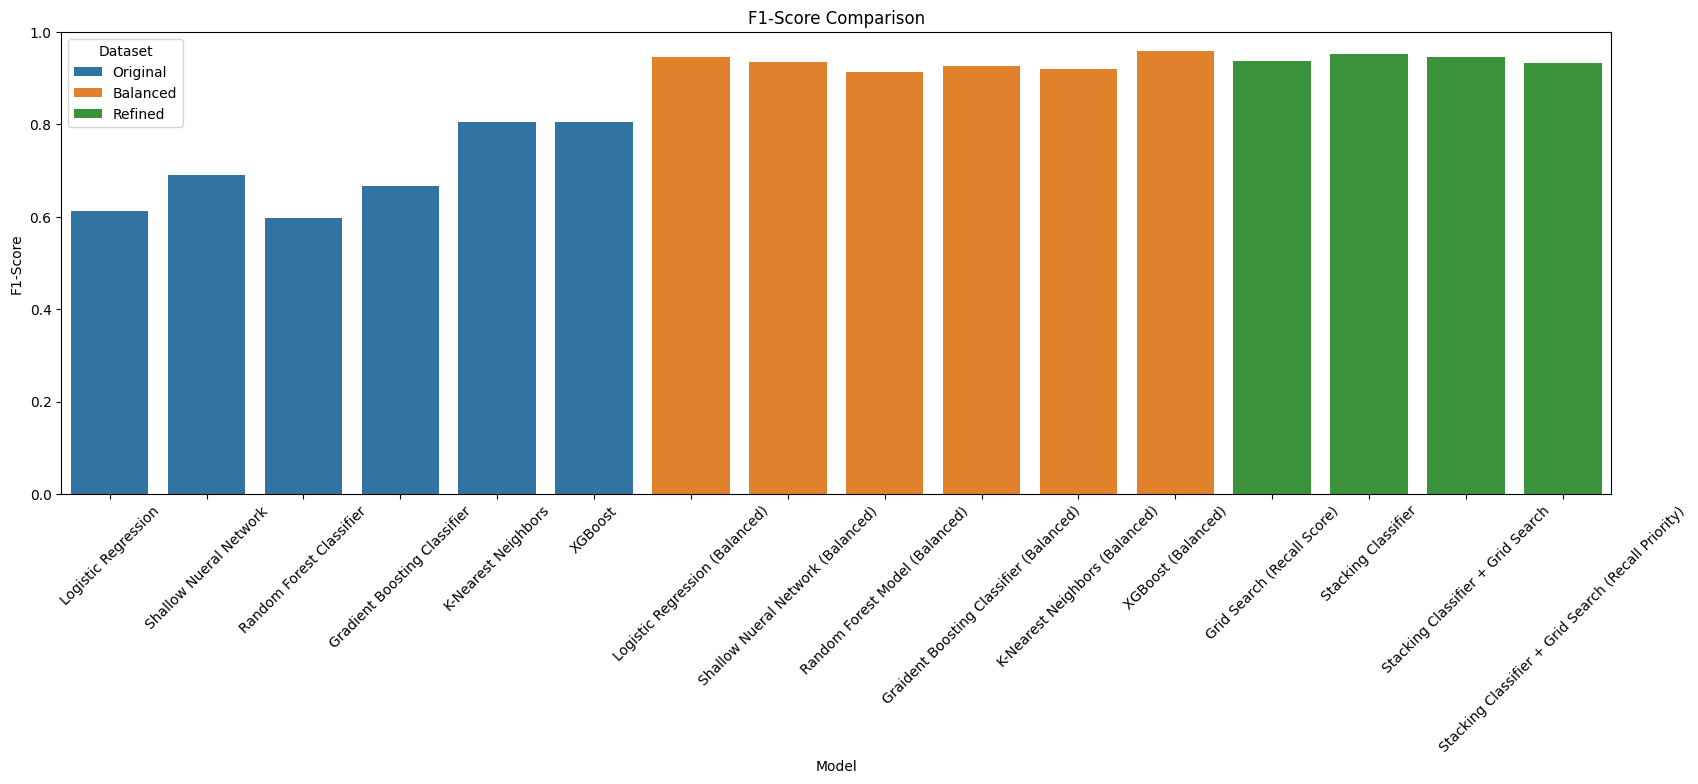

In [ ]:
import seaborn as sns

# Function to plot combined metrics
def plot_combined_metrics(metrics_df):
    # Plot Precision
    plt.figure(figsize=(20, 6))
    sns.barplot(x='Model', y='Precision', hue='Dataset', data=metrics_df)
    plt.title('Precision Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

    # Plot Recall
    plt.figure(figsize=(20, 6))
    sns.barplot(x='Model', y='Recall', hue='Dataset', data=metrics_df)
    plt.title('Recall Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

    # Plot F1-Score
    plt.figure(figsize=(20, 6))
    sns.barplot(x='Model', y='F1-Score', hue='Dataset', data=metrics_df)
    plt.title('F1-Score Comparison')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Plot combined metrics
plot_combined_metrics(all_metrics_df)